In [23]:
from rdflib import URIRef,Literal,Namespace,Graph
from rdflib.namespace import FOAF,XSD,RDF,SDO 

In [24]:
s=Namespace('http://test.com/B/')
p=Namespace('http://xmlns.com/foaf/0.1/')

In [25]:
year=Literal('1956',datatype=p['integer'])

In [26]:
susie=s['susie']
frank=s['Frank']
sandra=s['sandra']
jon=s['jon']
women=p['women']

In [27]:
g= Graph()
g.bind('s',s)
g.bind('p',p)

In [28]:
g.add((susie,p['bornIn'],year))
g.add((susie,p['hasChild'],frank))
g.add((susie,p['are'],women))
g.add((frank,p['motherIS'],susie))
g.add((frank,p['married'],sandra))
g.add((frank,p['hasChild'],jon))
g.add((sandra,p['hasChild'],jon))
g.add((sandra,p['married'],frank))
g.add((sandra,p['are'],women))
g.add((jon,p['motherIS'],sandra))
g.add((jon,p['fatherIS'],frank))

<Graph identifier=N5c2741cffc524b04858de79aa3c3cc87 (<class 'rdflib.graph.Graph'>)>

In [31]:
print(g.serialize(format='ttl'))

@prefix p: <http://xmlns.com/foaf/0.1/> .
@prefix s: <http://test.com/B/> .

s:susie p:are <http://xmlns.com/foaf/0.1/http://test.com/B/women> ;
    p:bornIn "1956"^^p:integer ;
    p:hasChild s:Frank .

s:jon p:fatherIS s:Frank ;
    p:motherIS s:sandra .

s:sandra p:are <http://xmlns.com/foaf/0.1/http://test.com/B/women> ;
    p:hasChild s:jon ;
    p:married s:Frank .

s:Frank p:hasChild s:jon ;
    p:married s:sandra ;
    p:motherIS s:susie .




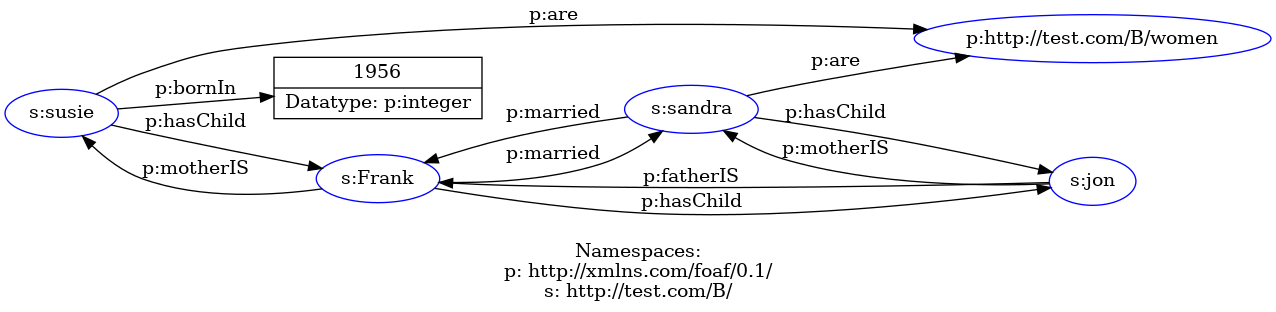

In [30]:
import requests
from IPython.display import Image
params = {
    'rdf': g.serialize(format='ttl'),
    'from': 'ttl',
    'to':'png'
    }
response = requests.get('http://www.ldf.fi/service/rdf-grapher',params=params)
img = Image(response.content)
display(img)